# Data Input

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++')
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file1 = '/content/drive/MyDrive/Data_Science_Portofolio/customer.csv'
file2 = '/content/drive/MyDrive/Data_Science_Portofolio/product.csv'
file3 = '/content/drive/MyDrive/Data_Science_Portofolio/store.csv'
file4 = '/content/drive/MyDrive/Data_Science_Portofolio/transaction.csv'

df_customer = pd.read_csv('/content/drive/MyDrive/Data_Science_Portofolio/customer.csv', delimiter =';')
df_product = pd.read_csv('/content/drive/MyDrive/Data_Science_Portofolio/product.csv', delimiter =';')
df_store = pd.read_csv('/content/drive/MyDrive/Data_Science_Portofolio/store.csv', delimiter =';')
df_transaction = pd.read_csv('/content/drive/MyDrive/Data_Science_Portofolio/transaction.csv', delimiter =';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_customer.shape, df_product.shape, df_store.shape, df_transaction.shape

((447, 5), (10, 3), (14, 6), (5020, 8))

In [ ]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


# Data Cleansing

In [ ]:
#Customer
df_customer['Income'].replace(r'[,]', '.', regex=True).astype('float')

0       5.12
1       6.23
2       9.17
3       4.87
4       3.57
       ...  
442     9.28
443    15.31
444    14.48
445     7.81
446    20.37
Name: Income, Length: 447, dtype: float64

In [ ]:
#Store
df_store['Latitude'].replace(r'[,]', '.', regex=True).astype('float')
df_store['Longitude'].replace(r'[,]', '.', regex=True).astype('float')

0     106.816666
1     107.608238
2     110.370529
3     110.416664
4     112.768845
5     119.423790
6     114.590111
7      95.323753
8     128.190643
9      98.678513
10    101.447403
11    104.756554
12    116.825264
13    105.266670
Name: Longitude, dtype: float64

In [ ]:
#Transaction
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

# Data Combining

In [ ]:
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [ ]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


# Regression Machine Learning Model



In [ ]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty': 'sum'
}).reset_index()

In [ ]:
df_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


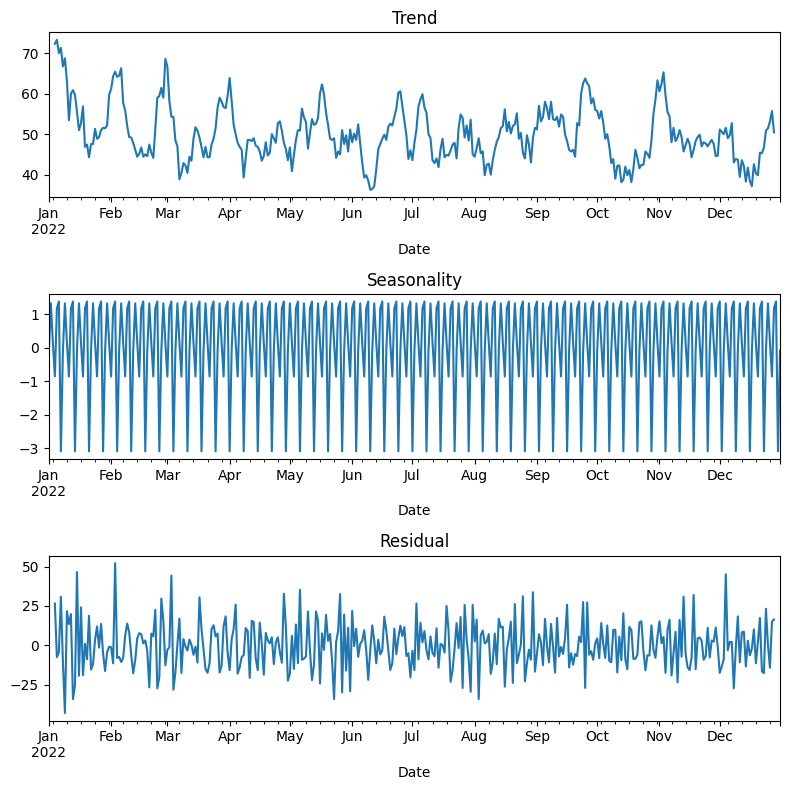

In [ ]:
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()

In [ ]:
cut_off = round(df_regresi.shape[0] * 0.9)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((328, 2), (37, 2))

In [ ]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
323,2022-11-20,55
324,2022-11-21,55
325,2022-11-22,49
326,2022-11-23,40


In [ ]:
df_test

,Date,Qty
0,2022-11-25,55
1,2022-11-26,40
2,2022-11-27,53
3,2022-11-28,50
4,2022-11-29,55
5,2022-11-30,45
6,2022-12-01,35
7,2022-12-02,34
8,2022-12-03,41
9,2022-12-04,98


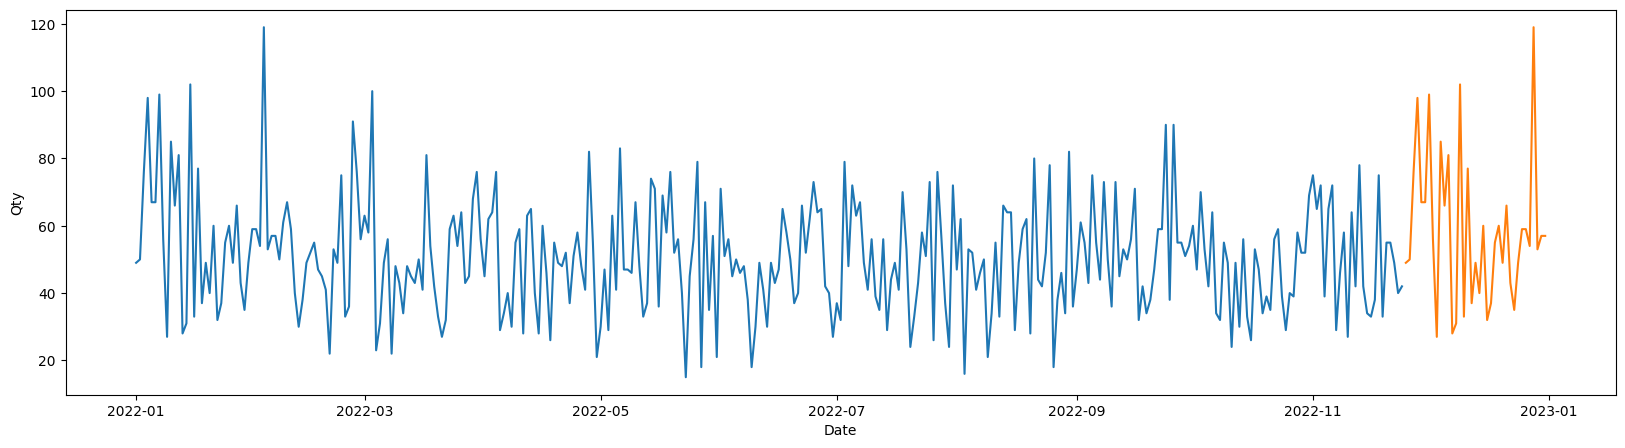

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_train['Qty']);

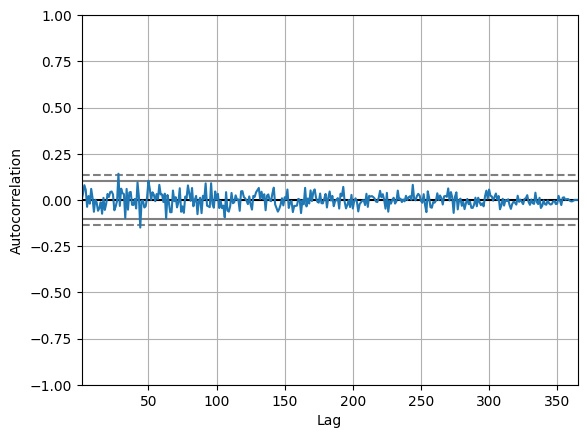

In [ ]:
autocorrelation_plot(df_regresi['Qty']);

In [ ]:
def rmse (y_actual, y_pred):
  print(f'RMSE value (mean_squared_error(y_actual,y_pred)**0.5)')

def eval (y_actual, y_pred):
  rmse(y_actual, y_pred)
  print(f'MAE value (mean_absolute_error(y_actual, y_pred))')

Mean Squared Error (MSE): 255.65987045588795
Root Mean Squared Error (RMSE): 15.989367418878333
Mean Absolute Error (MAE): 12.440102468204135


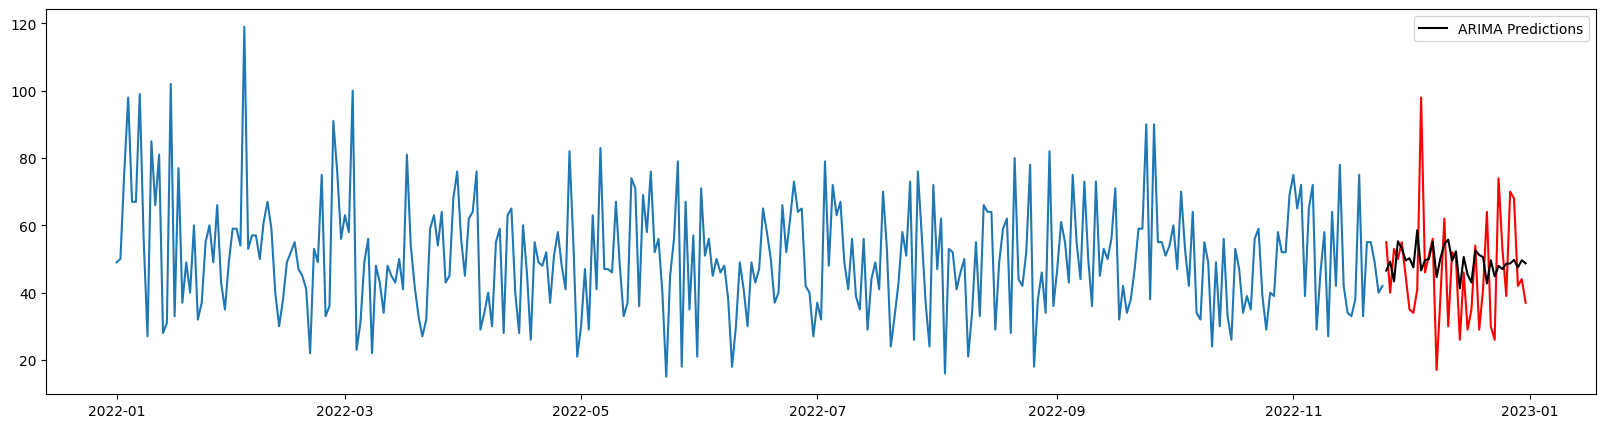

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAmodel = tsa.ARIMA(y, order=(40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

mse = mean_squared_error(df_test['Qty'], y_pred_out)
rmse = mean_squared_error(df_test['Qty'], y_pred_out, squared=False)  # Calculate RMSE by setting squared=False
mae = mean_absolute_error(df_test['Qty'], y_pred_out)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()
plt.show()

# Clustering

In [ ]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [ ]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [ ]:
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [ ]:
data_cluster = df_cluster.drop(columns=['TransactionID'])
data_cluster_normalize = preprocessing.normalize(data_cluster)

In [ ]:
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [ ]:
K = range(2,8)
fits = []
score = []

for k in K:
  model = KMeans(n_clusters = k, random_state=0, n_init = 'auto').fit(data_cluster_normalize)

  fits.append(model)
  score.append(silhouette_score(data_cluster_normalize, model.labels_, metric ='euclidean'))

<Axes: >

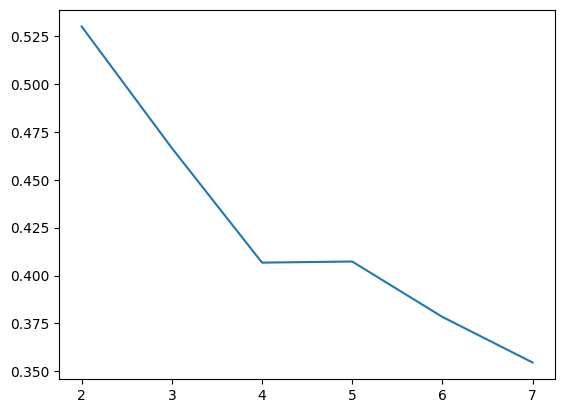

In [ ]:
#choose 4 cluster
sns.lineplot(x=K, y = score)

In [ ]:
df_cluster['cluster_label'] = fits[2].labels_

In [ ]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926
